# When do the biggest fish bite?

You're an avid fisher. In the past year, you caught exactly $N = 1000$ fish and to celebrate the achievement you've decided to develop a statistical model that relates the weight $x$ of the fish to the time of day when you caught it. Specifically, each time you caught a fish you recorded the UNIX timestamp of that event into an array $T$, and its weight in grams into an array $X$. You want to regress fish weight on time of day caught, given the data $T, X$ you captured.

Develop a model that takes a timestamp as input, and returns the expected weight of a fish caught at that timestamp. Use whatever techniques you think are appropriate.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Make data

In [3]:
def make_data():
    t0 = 1649730445 # April 10, 2022, 2:27:25 GMT
    N = 1000
    T = np.random.uniform(t0, t0 + 365*24*3600, N)
    Tday = T % (24*3600)
    Tsin = np.sin(2*np.pi*Tday / (24*3600))
    Tcos = np.cos(2*np.pi*Tday / (24*3600))
    Tcos3 = np.cos(3*2*np.pi*Tday / (24*3600))

    X = 50*Tsin + 620*Tcos + 121*Tcos3
    X -= -100 + np.min(X)
    X *= np.random.normal(1, 0.1, N)**2
    X -= -123.4 + np.min(X)
    return T, X

### Your solution here

In [4]:
T, X = make_data()

### Hint - Here's how to get working with the time stamp
* We can wrap 1 year worth of data into a 24 hour span. The visualization is below

In [5]:
Tday = T % (24*3600)

Text(0, 0.5, 'Weight of fish caught in grams')

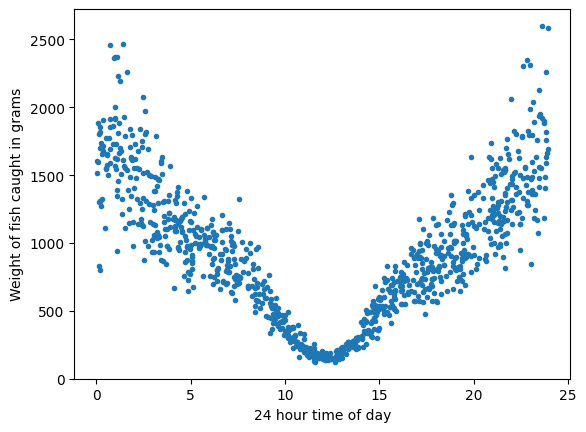

In [9]:
plt.plot(Tday/3600, X, ".")
plt.ylim((0, None))
plt.xlabel("24 hour time of day")
plt.ylabel("Weight of fish caught in grams")